In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from minisom import MiniSom
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
print(dataset)

     CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0      15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1      15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2      15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3      15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4      15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
..          ...  ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...   
685    15808223   1  31.57  10.500   2  14   4  6.500   1   0    0    0    2   
686    15769980   1  20.67   0.415   2   8   4  0.125   0   0    0    0    2   
687    15675450   0  18.83   9.540   2   6   4  0.085   1   0    0    0    2   
688    15776494   0  27.42  14.500   2  14   8  3.085   1   1    1    0    2   
689    15592412   1  41.00   0.040   2  10   4  0.040   0   1    1    0    1   

     A13   A14  Class  
0    100  1213 

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X, y)

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]] [0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 

In [5]:
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [6]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration = 100)

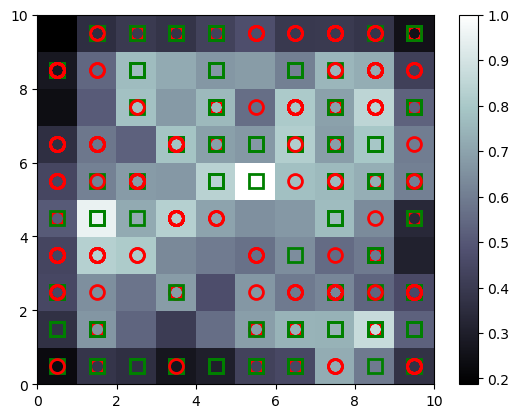

In [7]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [8]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5, 5)], mappings[(8, 1)], mappings[(1, 4)]), axis=0)
frauds_decoded = sc.inverse_transform(frauds)
print(frauds_decoded[:, 0])

[15790113. 15766183. 15808662. 15684722. 15772329. 15734649. 15646082.
 15717629. 15757188. 15604536. 15635598. 15647191. 15776545. 15623369.
 15793896. 15650591. 15633608. 15675450. 15654859. 15566495.]


In [9]:
customers = dataset.iloc[:, 1:]
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds_decoded:
        is_fraud[i] = 1

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(customers)

In [11]:
classifier = Sequential()
classifier.add(Dense(units=2, kernel_initializer = 'uniform', activation='relu', input_dim=15))
classifier.add(Dense(units=1, kernel_initializer = 'uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, is_fraud, batch_size=1, epochs=2)

Epoch 1/2
690/690 [==============================] - 2s 1ms/step - loss: 0.4484 - accuracy: 0.9710
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.1494 - accuracy: 0.9710


In [23]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)
y_pred = y_pred[y_pred[:, 1].argsort()]
print(y_pred)

[[1.5788215e+07 0.0000000e+00]
 [1.5773934e+07 0.0000000e+00]
 [1.5706762e+07 0.0000000e+00]
 ...
 [1.5717065e+07 3.3935222e-01]
 [1.5577515e+07 3.3935222e-01]
 [1.5776156e+07 3.3935222e-01]]
